In [1]:
import numpy as np # data manipulation
import pandas as pd # dataframe manipulation
import matplotlib.pyplot as plt # visualization
from numpy.random import default_rng # creating arbitrary vectors
import lucem_illud_2020 # for tokenizing
from PIL import Image # for masking wordcloud
import wordcloud # for making wordcloud

# Illustrations of how the survey dimensions are created and how the author vectors are projected to the survey dimension

In [2]:
# create arbitrary vectors to use as anchors
rng = default_rng(seed=15)
left_anchor_x = rng.normal(loc=-9.5, scale=0.25, size=10)
left_anchor_y = np.sqrt(100 - left_anchor_x ** 2)
right_anchor_x = rng.normal(loc=9.5, scale=0.25, size=10)
right_anchor_y = np.sqrt(100 - right_anchor_x ** 2)

In [3]:
# creating arbitrary vectors
rng = default_rng(seed=20)
epsilon = rng.normal(loc=0, scale=0.5, size=10)
authors_x = np.linspace(-8, 8, 10) + epsilon
authors_y = np.sqrt(100 - authors_x ** 2)

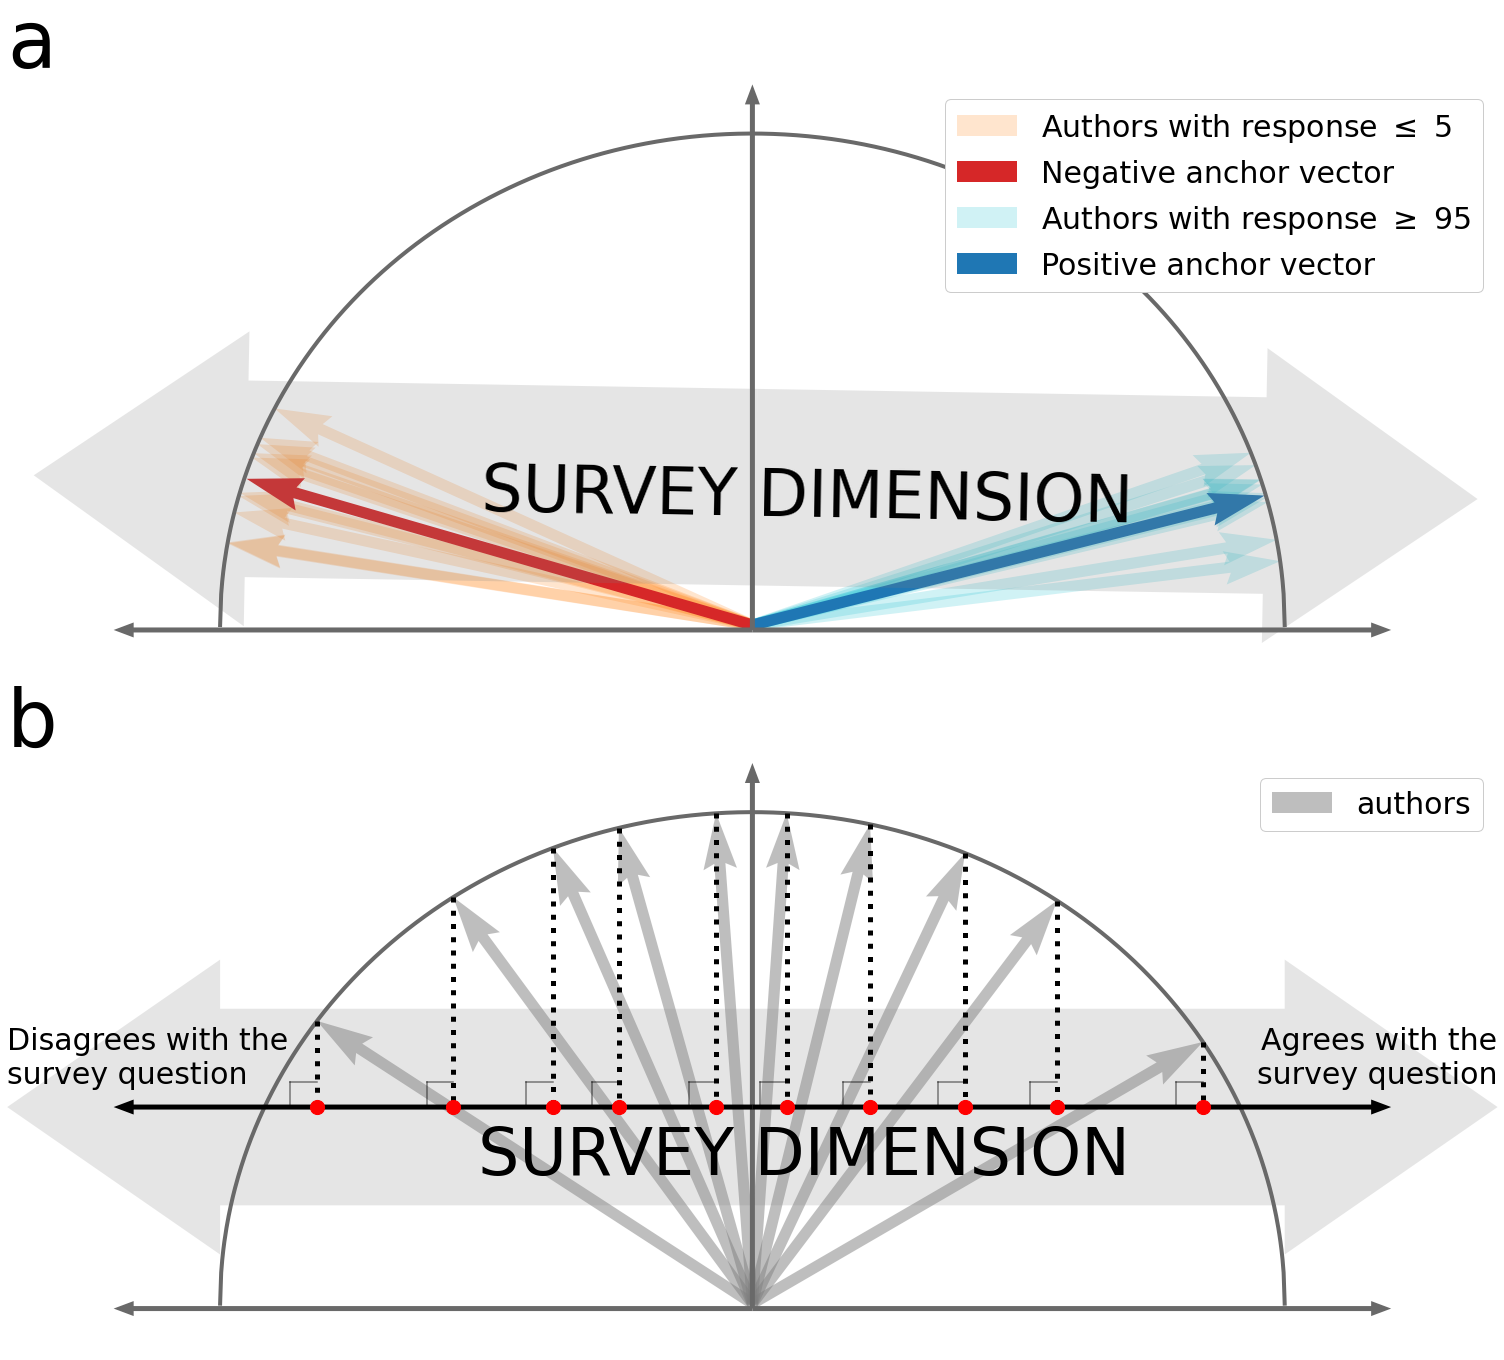

In [4]:
fig, ax = plt.subplots(figsize=(21,19), nrows=2)

############## Plot A #############
# plotting the origin lines
ax[0].annotate(s='', xy=(-12, -0.1), xytext=(0, -0.1), arrowprops=dict(width=5, headwidth=15, headlength=20, 
                                                                       linewidth=0, color='dimgrey'))
ax[0].annotate(s='', xy=(12, -0.1), xytext=(0, -0.1), arrowprops=dict(width=5, headwidth=15, headlength=20, 
                                                                      linewidth=0, color='dimgrey'))
ax[0].annotate(s='', xy=(0,11), xytext=(0, -0.1), arrowprops=dict(width=5, headwidth=15, headlength=20, 
                                                                  linewidth=0, color='dimgrey'))

# plotting the half circle
x = np.linspace(-10, 10, 1000)
y = np.sqrt(100 - x ** 2)
ax[0].plot(x, y, c='dimgrey', lw=4)

# plotting the vectors
origin = [0] * len(left_anchor_x)
ax[0].quiver(origin, origin, left_anchor_x, left_anchor_y,
             angles='xy', scale_units='xy', scale=1,
             alpha=0.2, color='tab:orange', label="Authors with response $\leq$ 5")
ax[0].quiver([0], [0], left_anchor_x.mean(), left_anchor_y.mean(), 
             angles='xy', scale_units='xy', scale=1, 
             color ='tab:red', label='Negative anchor vector')
ax[0].quiver(origin, origin, right_anchor_x, right_anchor_y, 
             angles='xy', scale_units='xy', scale=1,
             alpha=0.2, color='tab:cyan', label="Authors with response $\geq$ 95")
ax[0].quiver([0], [0], right_anchor_x.mean(), right_anchor_y.mean(), 
             angles='xy', scale_units='xy', scale=1, 
             color ='tab:blue', label='Positive anchor vector')

# plotting the survey dimension (the gray arrow)
ax[0].arrow(x=(right_anchor_x.mean() + left_anchor_x.mean()) / 2,
            y=(right_anchor_y.mean() + left_anchor_y.mean()) / 2,
            dx=(right_anchor_x.mean() - left_anchor_x.mean()) / 2,
            dy=(right_anchor_y.mean() - left_anchor_y.mean()) / 2, 
            alpha=0.2, width=4, head_width=6, head_length=4, lw=0, color='gray')
ax[0].arrow(x=(right_anchor_x.mean() + left_anchor_x.mean()) / 2,
            y=(right_anchor_y.mean() + left_anchor_y.mean()) / 2,
            dx=(left_anchor_x.mean() - right_anchor_x.mean()) / 2,
            dy=(left_anchor_y.mean() - right_anchor_y.mean()) / 2, 
            alpha=0.2, width=4, head_width=6, head_length=4, lw=0, color='gray')
# putting text on the survey dimension
ax[0].text(x=(right_anchor_x.mean() + left_anchor_x.mean()) / 2,
           y=(right_anchor_y.mean() + left_anchor_y.mean()) / 2 - 0.2,
           s='     SURVEY DIMENSION', size=65, 
           rotation=np.degrees(np.arctan2(right_anchor_y.mean() - left_anchor_y.mean(), right_anchor_x.mean() - left_anchor_x.mean())),
           ha='center',va='center') 

# legend
ax[0].legend(loc=1, framealpha=1, prop={'size': 30})

# prettifying the figure
ax[0].axis('off')
ax[0].set_xlim(-14, 14)
ax[0].set_ylim(-1, 11)
ax[0].set_title('a', loc='left', fontsize=80)
plt.tight_layout()

############## Plot B #############
# plotting the origin lines
ax[1].annotate(s='', xy=(-12, -0.1), xytext=(0, -0.1), arrowprops=dict(width=5, headwidth=15, headlength=20, 
                                                                       linewidth=0, color='dimgrey'))
ax[1].annotate(s='', xy=(12, -0.1), xytext=(0, -0.1), arrowprops=dict(width=5, headwidth=15, headlength=20, 
                                                                      linewidth=0, color='dimgrey'))
ax[1].annotate(s='', xy=(0,11), xytext=(0, -0.1), arrowprops=dict(width=5, headwidth=15, headlength=20, 
                                                                  linewidth=0, color='dimgrey'))

# plotting the half circle
x = np.linspace(-10, 10, 1000)
y = np.sqrt(100 - x ** 2)
ax[1].plot(x, y, c='dimgrey', lw=4)

# plotting the vectors
origin = [0] * len(left_anchor_x)
ax[1].quiver(origin, origin, authors_x, authors_y,
             angles='xy', scale_units='xy', scale=1, color='tab:gray', alpha=0.5, label='authors')

# plotting the survey dimension (the gray arrow)
ax[1].arrow(x=0, y=4, dx=-10, dy=0, alpha=0.2, width=4, head_width=6, 
            head_length=4, lw=0, color='gray')
ax[1].arrow(x=0, y=4, dx=10, dy=0, alpha=0.2, width=4, head_width=6, 
            head_length=4, lw=0, color='gray')
ax[1].text(x=0, y=3, s='     SURVEY DIMENSION', size=65, ha='center',va='center') 
ax[1].text(x=-14, y=5, s='Disagrees with the\nsurvey question', size=30, va='center')
ax[1].text(x=14, y=5, s='Agrees with the\nsurvey question', size=30, ha='right', va='center')

# plotting the vector line where the author vectors are projected to
ax[1].annotate(s='', xy=(-12, 4), xytext=(0, 4), arrowprops=dict(width=5, headwidth=15, headlength=20, 
                                                                 linewidth=0, color='black'))
ax[1].annotate(s='', xy=(12, 4), xytext=(0, 4), arrowprops=dict(width=5, headwidth=15, headlength=20, 
                                                                linewidth=0, color='black'))

# plotting the projection
for idx in range(10):
    ax[1].plot([authors_x[idx], authors_x[idx]], [authors_y[idx], 4], lw=5, color='black', linestyle='dotted')
    ax[1].plot([authors_x[idx] - 0.5, authors_x[idx] -0.5], [4, 4.5], color='black', alpha=0.5)
    ax[1].plot([authors_x[idx] - 0.5, authors_x[idx]], [4.5, 4.5], color='black', alpha=0.5)
ax[1].scatter(authors_x, [4] * 10, color='red', s=200, zorder=10)

#legend
ax[1].legend(loc=1, framealpha=1, prop={'size': 30})

# prettifying the figure
ax[1].axis('off')
ax[1].set_xlim(-14, 14)
ax[1].set_ylim(-1, 11)
ax[1].set_title('b', loc='left', fontsize=80)
plt.tight_layout()
plt.savefig('figures/survey_dimension_building_projection.png')

# Word Cloud to use for presentation

In [7]:
lst = ["Common domains of study in psychology such as 'short term memory', 'attention', and 'motivation' are merely theoretical constructs; a science of psychology developed by a different culture might end up with entirely different constructs and domains of study.",
 "Common domains of study in psychology such as 'short term memory', 'attention', and 'motivation' all correspond to real mechanisms; any science of psychology would converge on to the same constructs and domains of study.",
 "Human cognition is largely independent of language.",
 "Without language, human cognition would be unrecognizable.",
 "Compared to a model of behavior expressed in verbal terms, a mathematical model of the same behavior does NOT necessarily mean the field of psychology has achieved greater understanding of that behavior.",
 "Compared to a model of behavior expressed in verbal terms, a mathematical model of the same behavior means the field of psychology has achieved greater understanding of that behavior.",
 "There are some patterns in nature that we will never understand, given the limitations of our minds.",
 "Our minds are capable of understanding all the patterns of nature.",
 "The homo economicus (the assumption that humans are rational, self-interested agents in pursuit of maximizing personal gain) is NOT anaccurate model of human behavior.",
 "The homo economicus is an accurate model of human behavior.",
 "Even a complete understanding of neurobiology will NOT allow us to fully understand human behavior.",
 "The key to understanding human behavior is to understand its neurobiological mechanisms.",
 "Psychological research can progress best if scientists focus on studying individual processes (e.g., working memory, attention, object recognition, language comprehension) in isolation from other processes.",
 "Psychological research is slowed by scientists’ focus on studying individual processes (e.g., working memory, attention, object recognition, language comprehension) in isolation from other processes.",
 "An individual's personality varies quite widely over their lifetime.",
 "An individual's personality is quite stable over their lifetime.",
 "At its most basic, human cognition is NOT sensitive to context; what needs to be explained is when human behaviors become context-dependent.",
 "At its most basic, human cognition is sensitive to context; what needs to be explained is when human behaviors generalize across many contexts.",
 "Human cognitive capacities such as language and reasoning are learned rather than innate.",
 "Human cognitive capacities such as language and reasoning are innate rather than learned.",
 "Psychologists should focus on discovering ways in which human behavior differs from ideal / abstract rules.",
 "Psychologists should focus on discovering ideal / abstract rules underlying human cognition.",
 "Psychological theories should NOT be more focused on the evolutionary history of human mental faculties than they currently are.",
 "Psychological theories should be more focused on the evolutionary history of human mental faculties than they currently are.",
 "A modern digital computer is NOT a good model for the human mind.",
 "A modern digital computer is a good model for the human mind.",
 "Human minds differ so widely that there is NO real sense in talking of 'The Human Mind'.",
 "All human minds are fundamentally the same. There is really just 'The Human Mind'.",
 "Most human behaviors can be productively studied without reference to people's social environment.",
 "Most human behaviors CANNOT be productively studied without reference to people's social environment.",
 "Human perception is NOT a reliable guide to truth.",
 "Human perception is a reliable guide to truth."]
controversies = pd.DataFrame()
controversies['text'] = lst
controversies['tokenized_text'] = controversies['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
controversies['normalized_tokens'] = controversies['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

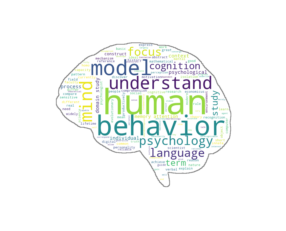

<Figure size 432x288 with 0 Axes>

In [8]:
brain_mask = np.array(Image.open("figures/masked_brain.png"))

wc = wordcloud.WordCloud(background_color="white", max_words=1000, mask=brain_mask,
                         width= 1000, height = 1000,contour_width=4, contour_color='gray')

# generate word cloud
wc.generate(' '.join(controversies['normalized_tokens'].sum()))

# store to file
wc.to_file("figures/word_cloud.png")

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()